# Pipeline for the anomaly detection on the SKAB using LSTM-Autoencoder

In [1]:
# libraries importing
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from io import StringIO
import requests
from tsad.evaluating.evaluating import evaluating

# Data loading

In [2]:
def dataframe_expirement(i):
    if i == 1:
        url = "https://storage.yandexcloud.net/cloud-files-public/dataframe.csv" 
        dataframe = pd.read_csv(StringIO(requests.get(url).content.decode('utf-8')), sep='|')
        dataframe_columns = dataframe.columns 
        first_label_list = dataframe[dataframe_columns[0]].unique() 
        dataframe_aa564g = dataframe[dataframe[dataframe_columns[0]] == first_label_list[0]]
        dataframe_aa564g_first = dataframe_aa564g.drop(axis=1, labels=(dataframe_aa564g.columns[0])) \
            .drop(axis=1, labels=(dataframe_aa564g.columns[1]))[['m', 'v/v', 'v/v.1',
                                                                 'uR/h', 'ohmm', 'ohmm.1', 'ohmm.2', 'ohmm.3', 'ohmm.5',
                                                                 'ohmm.6',
                                                                 'unitless', 'unitless.1']].reset_index(drop=True)
        dataframe_edited_ = dataframe_aa564g_first.loc[dataframe_aa564g_first['unitless.1'] >= 0] \
            .loc[dataframe_aa564g_first['unitless'] >= 0].loc[dataframe_aa564g_first['ohmm'] >= 0] \
            .loc[dataframe_aa564g_first['ohmm.1'] >= 0].loc[dataframe_aa564g_first['ohmm.2'] >= 0] \
            .loc[dataframe_aa564g_first['ohmm.3'] >= 0].loc[dataframe_aa564g_first['ohmm.5'] >= 0] \
            .loc[dataframe_aa564g_first['ohmm.6'] >= 0].loc[dataframe_aa564g_first['uR/h'] >= 0] \
            .loc[dataframe_aa564g_first['v/v.1'] >= 0].loc[dataframe_aa564g_first['v/v'] >= 0] \
            .reset_index(drop=True)
    else:
        url = "https://storage.yandexcloud.net/cloud-files-public/noname_ECG_2022.csv" 
        dataframe_edited_ = pd.read_csv(StringIO(requests.get(url).content.decode('utf-8')), sep=',')
    return dataframe_edited_

In [3]:
ts_data_1, ts_data_2 = dataframe_expirement(1), dataframe_expirement(0).iloc[2500:].reset_index().drop(labels='index',axis=1)

# Data description and visualization

In [4]:
from scipy.signal import find_peaks

In [5]:
def plot_data_scores_and_selected_window(ts, score_list, window_size_selected):
    f, ax = plt.subplots(2, 1, figsize=(30, 20))
    ax[0].plot(ts)
    ax[0].vlines(x=window_size_selected, ymin=min(ts), ymax=max(ts),
        linestyle = ':',
        linewidth = 6,
        color = 'darkblue')
    ax[0].set_title("ts")
    ax[1].plot(score_list, "r")
    ax[1].set_title("score")
    f.show()

In [6]:
# dataset characteristics printing
print(f'A number of datasets: {2}\n')
print(f'Shape of the well dataset: {ts_data_1.shape}\n')
print(f'Shape of the medical dataset: {ts_data_2.shape}\n')
cp_1 = []
temp_value_second = 0
for i in range(len(ts_data_1)):
    temp_value = ts_data_1['unitless'][i]
    if temp_value != temp_value_second:
        cp_1.append(1)
    else:
        cp_1.append(0)
    temp_value_second = temp_value
cp_1[0] = 0
cp_2 = []
peaks, _ = find_peaks(ts_data_2['EcgWaveform'], distance=250)
for i in range(len(ts_data_2)):
    if i not in peaks:
        cp_2.append(0)
    else:
        cp_2.append(1)
ts_data_1['change_points'] = cp_1
ts_data_2['change_points'] = cp_2
print(f'A number of datasets: {2}\n')
print(f'Shape of the well dataset: {ts_data_1.shape}\n')
print(f'Shape of the medical dataset: {ts_data_2.shape}\n')
n_cp_1 = cp_1.count(1)
n_cp_2 = cp_2.count(1)
print(f'A number of changepoints in the well dataset: {n_cp_1}\n')
print(f'A number of changepoints in the medical dataset: {n_cp_2}\n')
print(f'Head of the well dataset:')
display(ts_data_1.head())
print(f'Head of the well dataset:')
display(ts_data_2.head())

A number of datasets: 2

Shape of the well dataset: (8754, 12)

Shape of the medical dataset: (17500, 2)

A number of datasets: 2

Shape of the well dataset: (8754, 13)

Shape of the medical dataset: (17500, 3)

A number of changepoints in the well dataset: 52

A number of changepoints in the medical dataset: 37

Head of the well dataset:


,m,v/v,v/v.1,uR/h,ohmm,ohmm.1,ohmm.2,ohmm.3,ohmm.5,ohmm.6,unitless,unitless.1,change_points
0,3185.5,0.960549,0.901756,56.50,38.11802,46.61687,26.52874,36.00038,0.126035,0.126063,5,1,0
1,3185.6,0.960549,0.924199,55.10,38.51000,41.08000,28.23000,30.61000,0.126035,0.126062,5,1,0
2,3185.7,0.960549,0.920993,55.30,38.49500,40.22613,27.25827,29.11342,0.126035,0.126062,5,1,0
3,3185.8,0.960549,0.917787,55.50,38.48000,39.39000,26.32000,27.69000,0.126035,0.126062,5,1,0
4,3185.9,0.960549,0.922435,55.21,37.06394,38.07816,28.97599,30.48858,0.126035,0.126061,5,1,0


Head of the well dataset:


,Time,EcgWaveform,change_points
0,04/08/2022 08:38:37.946,2450,0
1,04/08/2022 08:38:37.947,2447,0
2,04/08/2022 08:38:37.948,2445,0
3,04/08/2022 08:38:37.949,2442,0
4,04/08/2022 08:38:37.950,2440,0


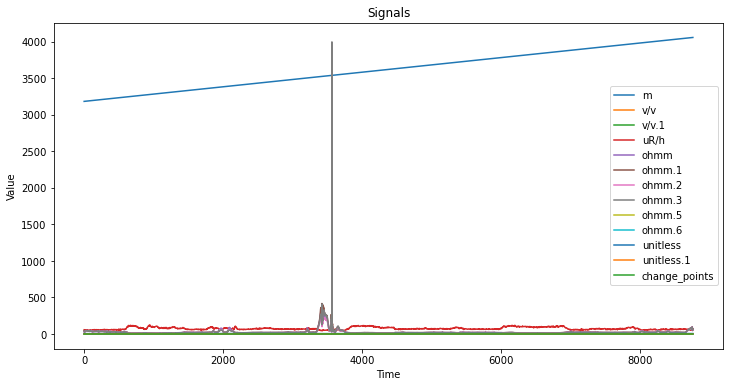

In [7]:
# well dataset visualizing
ts_data_1.plot(figsize=(12,6))
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Signals')
plt.show()

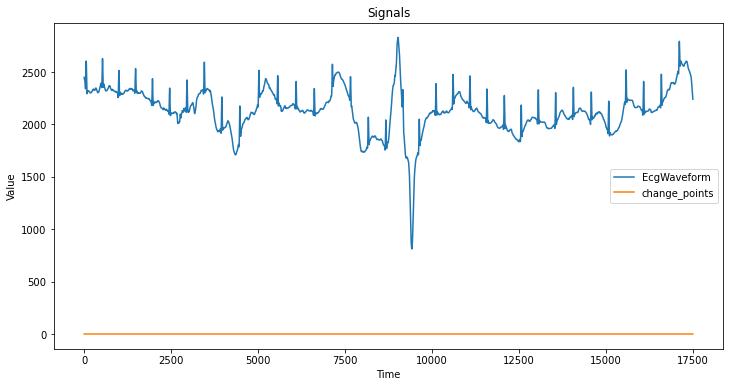

In [8]:
# medical dataset visualizing
ts_data_2.plot(figsize=(12,6))
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Signals')
plt.show()

In [9]:
list_of_df = [ts_data_1[['change_points','uR/h','ohmm']], ts_data_2.drop('Time', axis=1)]

# Method applying

In [33]:
# libraries importing
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [34]:
# Function for repeatability
def Random(seed_value):
    # 1. Set `PYTHONHASHSEED` environment variable at a fixed value
    import os
    os.environ['PYTHONHASHSEED']=str(seed_value)

    # 2. Set `python` built-in pseudo-random generator at a fixed value
    import random
    random.seed(seed_value)

    # 3. Set `numpy` pseudo-random generator at a fixed value
    import numpy as np
    np.random.seed(seed_value)

    # 4. Set `tensorflow` pseudo-random generator at a fixed value
    import tensorflow as tf
    tf.random.set_seed(seed_value)

In [35]:
def arch(data):
    EPOCHS = 100
    BATCH_SIZE = 32
    VAL_SPLIT = 0.1
    
    Random(0)    
    # model defining
    # define encoder
    inputs = keras.Input(shape=(data.shape[1], data.shape[2]))
    encoded = layers.LSTM(100, activation='relu')(inputs)

    # define reconstruct decoder
    decoded = layers.RepeatVector(data.shape[1])(encoded)
    decoded = layers.LSTM(100, activation='relu', return_sequences=True)(decoded)
    decoded = layers.TimeDistributed(layers.Dense(data.shape[2]))(decoded)

    # tie it together
    model = keras.Model(inputs, decoded)
    encoder = keras.Model(inputs, encoded)

    model.compile(optimizer='adam', loss='mae', metrics=["mse"])
    
    # callbacks defining
    early_stopping = EarlyStopping(patience=5, verbose=0)
#     reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.0001, verbose=0)
    
    # model fitting
    history = model.fit(data, data,
                        validation_split=VAL_SPLIT,
                        epochs=EPOCHS,
                        batch_size=BATCH_SIZE,
                        verbose=0,
                        shuffle=False,
                        callbacks=[early_stopping]#, reduce_lr]
                        )
    return history, model

# Training in the beginning of each dataset

In [13]:
N_STEPS = 60
Q = 0.999 # quantile for upper control limit (UCL) selection

In [36]:
# Generated training sequences for use in the model.
def create_sequences(values, time_steps=N_STEPS):
    output = []
    for i in range(len(values) - time_steps + 1):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)

In [38]:
%%time

# inference
predicted_outlier, predicted_cp = [], []
for df in list_of_df:
    X_train = df[:400].drop(['change_points'], axis=1)
    
    # scaler init and fitting
    StSc = StandardScaler()
    StSc.fit(X_train)
    
    # convert into input/output
    X = create_sequences(StSc.transform(X_train), N_STEPS)
    
    # model defining and fitting
    history, model = arch(X)
    
    # results predicting
    residuals = pd.Series(np.sum(np.mean(np.abs(X - model.predict(X)), axis=1), axis=1))
    UCL = residuals.quantile(Q)
    
    # results predicting
    X = create_sequences(StSc.transform(df.drop(['change_points'], axis=1)), N_STEPS)
    cnn_residuals = pd.Series(np.sum(np.mean(np.abs(X - model.predict(X)), axis=1), axis=1))
    
    # data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
    anomalous_data = cnn_residuals > (3/2 * UCL)
    anomalous_data_indices = []
    for data_idx in range(N_STEPS - 1, len(X) - N_STEPS + 1):
        if np.all(anomalous_data[data_idx - N_STEPS + 1 : data_idx]):
            anomalous_data_indices.append(data_idx)
    
    prediction = pd.Series(data=0, index=df.index)
    prediction.iloc[anomalous_data_indices] = 1
    
    # predicted outliers saving
    predicted_outlier.append(prediction)
    
    # predicted CPs saving
    prediction_cp = abs(prediction.diff())
    prediction_cp[0] = prediction[0]
    predicted_cp.append(prediction_cp)

Wall time: 36.9 s


# Results

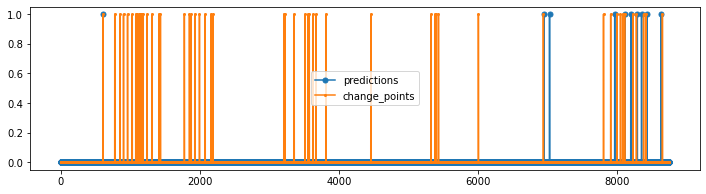

In [39]:
# true changepoint indices selection
true_cp = [df.change_points for df in list_of_df]

predicted_cp[0].plot(figsize=(12, 3), label='predictions', marker='o', markersize=5)
true_cp[0].plot(marker='o', markersize=2)
plt.legend();

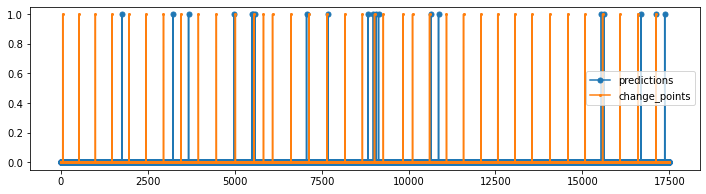

In [40]:
true_cp = [df.change_points for df in list_of_df]

predicted_cp[1].plot(figsize=(12, 3), label='predictions', marker='o', markersize=5)
true_cp[1].plot(marker='o', markersize=2)
plt.legend();

# Metrics calculation

In [41]:
from datetime import datetime, timedelta

In [42]:
t_0 = np.arange(len(true_cp[0])).astype('datetime64[s]')
t_1 = np.arange(len(true_cp[1])).astype('datetime64[s]')

In [43]:
df_0 = pd.DataFrame(index=t_0, columns=['predicted_cp'])
df_0['predicted_cp'] = np.array(predicted_cp[0])
df_0['true_cp'] = np.array(true_cp[0])

In [44]:
df_1 = pd.DataFrame(index=t_1, columns=['predicted_cp'])
df_1['predicted_cp'] = np.array(predicted_cp[1])
df_1['true_cp'] = np.array(true_cp[1])

In [45]:
# nab metric calculation
nab = evaluating(df_0['true_cp'], df_0['predicted_cp'], metric='nab', numenta_time='30 sec')

Intersection of scoring windows(Timestamp('1970-01-01 00:18:00'), Timestamp('1970-01-01 00:17:54'))
Intersection of scoring windows(Timestamp('1970-01-01 00:18:24'), Timestamp('1970-01-01 00:18:16'))
Intersection of scoring windows(Timestamp('1970-01-01 00:18:46'), Timestamp('1970-01-01 00:18:31'))
Intersection of scoring windows(Timestamp('1970-01-01 00:19:01'), Timestamp('1970-01-01 00:18:45'))
Intersection of scoring windows(Timestamp('1970-01-01 00:19:15'), Timestamp('1970-01-01 00:19:01'))
Intersection of scoring windows(Timestamp('1970-01-01 00:19:31'), Timestamp('1970-01-01 00:19:13'))
Intersection of scoring windows(Timestamp('1970-01-01 00:23:33'), Timestamp('1970-01-01 00:23:25'))
Intersection of scoring windows(Timestamp('1970-01-01 00:30:52'), Timestamp('1970-01-01 00:30:47'))
Intersection of scoring windows(Timestamp('1970-01-01 00:36:01'), Timestamp('1970-01-01 00:36:01'))
Intersection of scoring windows(Timestamp('1970-01-01 00:53:29'), Timestamp('1970-01-01 00:53:17'))


In [46]:
# average detection delay metric calculation
add = evaluating(df_0['true_cp'], df_0['predicted_cp'], metric='average_time', numenta_time='30 sec')

Intersection of scoring windows(Timestamp('1970-01-01 00:18:00'), Timestamp('1970-01-01 00:17:54'))
Intersection of scoring windows(Timestamp('1970-01-01 00:18:24'), Timestamp('1970-01-01 00:18:16'))
Intersection of scoring windows(Timestamp('1970-01-01 00:18:46'), Timestamp('1970-01-01 00:18:31'))
Intersection of scoring windows(Timestamp('1970-01-01 00:19:01'), Timestamp('1970-01-01 00:18:45'))
Intersection of scoring windows(Timestamp('1970-01-01 00:19:15'), Timestamp('1970-01-01 00:19:01'))
Intersection of scoring windows(Timestamp('1970-01-01 00:19:31'), Timestamp('1970-01-01 00:19:13'))
Intersection of scoring windows(Timestamp('1970-01-01 00:23:33'), Timestamp('1970-01-01 00:23:25'))
Intersection of scoring windows(Timestamp('1970-01-01 00:30:52'), Timestamp('1970-01-01 00:30:47'))
Intersection of scoring windows(Timestamp('1970-01-01 00:36:01'), Timestamp('1970-01-01 00:36:01'))
Intersection of scoring windows(Timestamp('1970-01-01 00:53:29'), Timestamp('1970-01-01 00:53:17'))


In [47]:
# nab metric calculation
nab = evaluating(df_1['true_cp'], df_1['predicted_cp'], metric='nab', numenta_time='30 sec')

Standart  -  -1.62
LowFP  -  -4.59
LowFN  -  -0.18


In [48]:
# average detection delay metric calculation
add = evaluating(df_1['true_cp'], df_1['predicted_cp'], metric='average_time', numenta_time='30 sec')

Amount of true anomalies 37
A number of missed CPs = 36
A number of FPs = 19
Average time 0 days 00:00:00
